In [102]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Non tongue roll train data

In [54]:
nonroll_train_path = './Non-roller/1.txt_and_59_files.csv/1.txt_and_59_files.variant.csv'

nonroll_train = pd.read_csv(nonroll_train_path, skiprows=24, header= None)

In [61]:
non_roll_snp = list(nonroll_train[14])

In [333]:
snp_list = ['rs1984112', 'rs1761667', 'rs1527483', 'rs2151916', 'rs1049673', 'rs3211931',
           'rs3840546', 'rs3211938', 'rs10499859', 'rs13438282','rs1358337', 'rs1054516',
           'rs1049654', 'rs3211909', 'rs3211849', 'rs3211913', 'rs13246513', 'rs3173798',
           'rs3211870', 'rs3211842', 'rs9784998', 'rs3211868', 'rs35874116', 'rs307355', 
           'rs35744813', 'rs713598', 'rs1726866', 'rs10246939', 'rs713598', 'rs1726866',
           'rs10246939', 'rs34160967', 'rs307377', 'rs239345', 'rs3785368', 'rs8065080',
           'rs7114', 'rs2107028', 'rs4245926', 'rs16909856', 'rs16909859',
            'rs3204145', 'rs3814', 'rs2292927', 'rs1995467']
table = {'rs1984112':[0]*180, 'rs1761667':[0]*180, 'rs1527483':[0]*180, 'rs2151916':[0]*180, 'rs1049673':[0]*180, 'rs3211931':[0]*180,
         'rs3840546':[0]*180, 'rs3211938':[0]*180, 'rs10499859':[0]*180, 'rs13438282':[0]*180,'rs1358337':[0]*180, 'rs1054516':[0]*180,
         'rs1049654':[0]*180, 'rs3211909':[0]*180, 'rs3211849':[0]*180, 'rs3211913':[0]*180, 'rs13246513':[0]*180, 'rs3173798':[0]*180,
         'rs3211870':[0]*180, 'rs3211842':[0]*180, 'rs9784998':[0]*180, 'rs3211868':[0]*180, 'rs35874116':[0]*180, 'rs307355':[0]*180, 
         'rs35744813':[0]*180, 'rs713598':[0]*180, 'rs1726866':[0]*180, 'rs10246939':[0]*180, 'rs713598':[0]*180, 'rs1726866':[0]*180,
         'rs10246939':[0]*180, 'rs34160967':[0]*180, 'rs307377':[0]*180, 'rs239345':[0]*180, 'rs3785368':[0]*180, 'rs8065080':[0]*180,
         'rs7114':[0]*180, 'rs2107028':[0]*180, 'rs4245926':[0]*180, 'rs16909856':[0]*180, 'rs16909859':[0]*180,
         'rs3204145':[0]*180, 'rs3814':[0]*180, 'rs2292927':[0]*180, 'rs1995467':[0]*180,
         'phenotype':['roll']*180}

In [334]:
m = 0
for phe in table['phenotype']:
    if m < 59:
        m = m + 1
        table['phenotype'][m] = 'non_roll'
        

# table['phenotype']

In [335]:
columns = []
for c in range(1,181):
    columns.append('{}.txt'.format(c))
df = pd.DataFrame(table, index= columns)
df['rs10246939']['1.txt']


0

In [296]:
# for re in ls:
#     columns.remove(re)
    
# columns[0:60]

In [336]:
stat_nonroll = [0]*len(snp_list)
num_nonroll = 0
for j in snp_list:
    for i in non_roll_snp:
        if i == j:
            print(i, non_roll_snp.index(i),nonroll_train[12][non_roll_snp.index(i)],
                  nonroll_train[1][non_roll_snp.index(i)], nonroll_train[3][non_roll_snp.index(i)]+'->'+nonroll_train[4][non_roll_snp.index(i)])
            stat_nonroll[num_nonroll] = nonroll_train[12][non_roll_snp.index(i)]
            ls = nonroll_train[13][non_roll_snp.index(i)].split(';')
            hom_het = nonroll_train[17][non_roll_snp.index(i)].split(';')
            for k in ls:
                df[j][k] = 1
            
                        
            
    num_nonroll = num_nonroll + 1

rs1761667 947705 1 chr7 G->A
rs1527483 848271 11 chr7 G->A


C:\Users\kjlya\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


rs3211931 700495 18 chr7 C->T
rs10499859 202810 44 chr7 A->G
rs13438282 202812 44 chr7 C->T
rs1358337 202827 20 chr7 G->A
rs1054516 202825 47 chr7 T->C
rs1049654 202817 47 chr7 A->C
rs3211909 627028 2 chr7 T->C
rs3211849 202824 35 chr7 A->G
rs3211913 627029 2 chr7 A->G
rs13246513 627031 36 chr7 C->T
rs3173798 866217 5 chr7 T->C
rs3211870 202826 37 chr7 C->T
rs3211842 202823 37 chr7 G->A
rs9784998 848267 11 chr7 C->T
rs3211868 848270 8 chr7 T->C
rs307355 918935 1 chr1 T->C
rs35744813 53 49 chr1 T->C
rs34160967 459991 8 chr1 G->A
rs307377 54 56 chr1 T->C
rs2107028 120501 12 chr4 G->A
rs4245926 120500 27 chr4 G->A
rs16909859 538624 6 chr9 G->A
rs3204145 253697 8 chr9 A->T
rs3814 424500 19 chr19 T->C
rs2292927 236947 55 chr8 T->C


In [311]:
df

,rs1984112,rs1761667,rs1527483,rs2151916,rs1049673,rs3211931,rs3840546,rs3211938,rs10499859,rs13438282,...,rs7114,rs2107028,rs4245926,rs16909856,rs16909859,rs3204145,rs3814,rs2292927,rs1995467,phenotype
1.txt,0,0,0,0,0,0,0,0,1,1,...,0,1,1,0,0,1,1,1,0,roll
2.txt,0,0,0,0,0,0,0,0,1,1,...,0,1,1,0,1,0,1,1,0,non_roll
3.txt,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,non_roll
4.txt,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,non_roll
5.txt,0,0,0,0,0,1,0,0,1,1,...,0,1,1,0,0,0,0,1,0,non_roll
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,roll
177.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,roll
178.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,roll
179.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,roll


In [337]:
stat_nonroll_rate = [i/60 for i in stat_nonroll]
stat_nonroll_rate

[0.0,
 0.016666666666666666,
 0.18333333333333332,
 0.0,
 0.0,
 0.3,
 0.0,
 0.0,
 0.7333333333333333,
 0.7333333333333333,
 0.3333333333333333,
 0.7833333333333333,
 0.7833333333333333,
 0.03333333333333333,
 0.5833333333333334,
 0.03333333333333333,
 0.6,
 0.08333333333333333,
 0.6166666666666667,
 0.6166666666666667,
 0.18333333333333332,
 0.13333333333333333,
 0.0,
 0.016666666666666666,
 0.8166666666666667,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.13333333333333333,
 0.9333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.45,
 0.0,
 0.1,
 0.13333333333333333,
 0.31666666666666665,
 0.9166666666666666,
 0.0]

## Tongue non-roll train data 

In [313]:
roll_train_path = './Tongue-roller/61.txt_and_119_files.csv/61.txt_and_119_files.variant.csv'

roll_train = pd.read_csv(roll_train_path, skiprows=24, header= None)

In [338]:
roll_snp = list(roll_train[14])

In [339]:
stat_roll = [0]*len(snp_list)
num_roll = 0
for j in snp_list:
    for i in roll_snp:
        if i == j:
            print(i, roll_snp.index(i),roll_train[12][roll_snp.index(i)])
            stat_roll[num_roll] = roll_train[12][roll_snp.index(i)]
            ls_2 = roll_train[13][roll_snp.index(i)].split(';')
            for k in ls_2:
                df[j][k] = 1
            
    num_roll = num_roll + 1

rs1761667 70565 1
rs1527483 710721 15


C:\Users\kjlya\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


rs3211931 70569 63
rs10499859 335386 86
rs13438282 335387 86
rs1358337 335399 62
rs1054516 70568 88
rs1049654 335390 92
rs3211909 971792 9
rs3211849 335397 75
rs3211913 971793 10
rs13246513 710725 75
rs3173798 710717 15
rs3211870 335398 76
rs3211842 335396 75
rs9784998 710712 18
rs3211868 710719 17
rs307355 31 1
rs35744813 160625 95
rs34160967 683097 27
rs307377 160626 113
rs2107028 264714 18
rs4245926 264713 87
rs16909856 86809 1
rs16909859 836896 13
rs3204145 379815 35
rs3814 528098 67
rs2292927 82210 115


In [317]:
df

,rs1984112,rs1761667,rs1527483,rs2151916,rs1049673,rs3211931,rs3840546,rs3211938,rs10499859,rs13438282,...,rs7114,rs2107028,rs4245926,rs16909856,rs16909859,rs3204145,rs3814,rs2292927,rs1995467,phenotype
1.txt,0,0,0,0,0,0,0,0,1,1,...,0,1,1,0,0,1,1,1,0,roll
2.txt,0,0,0,0,0,0,0,0,1,1,...,0,1,1,0,1,0,1,1,0,non_roll
3.txt,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,non_roll
4.txt,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,non_roll
5.txt,0,0,0,0,0,1,0,0,1,1,...,0,1,1,0,0,0,0,1,0,non_roll
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176.txt,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,roll
177.txt,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,roll
178.txt,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,roll
179.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,roll


In [340]:
stat_roll_rate = [i/120 for i in stat_roll]
stat_roll_rate

[0.0,
 0.008333333333333333,
 0.125,
 0.0,
 0.0,
 0.525,
 0.0,
 0.0,
 0.7166666666666667,
 0.7166666666666667,
 0.5166666666666667,
 0.7333333333333333,
 0.7666666666666667,
 0.075,
 0.625,
 0.08333333333333333,
 0.625,
 0.125,
 0.6333333333333333,
 0.625,
 0.15,
 0.14166666666666666,
 0.0,
 0.008333333333333333,
 0.7916666666666666,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.225,
 0.9416666666666667,
 0.0,
 0.0,
 0.0,
 0.0,
 0.15,
 0.725,
 0.008333333333333333,
 0.10833333333333334,
 0.2916666666666667,
 0.5583333333333333,
 0.9583333333333334,
 0.0]

In [343]:
df.to_csv('./data.csv')

In [204]:
%ls

 Volume in drive D is New Volume
 Volume Serial Number is 4AD5-03DA

 Directory of D:\Downloads\bioinformatics\bioinformatics\tongue

04/19/2020  11:52 PM    <DIR>          .
04/19/2020  11:52 PM    <DIR>          ..
04/19/2020  05:22 PM    <DIR>          .ipynb_checkpoints
04/18/2020  07:04 PM    <DIR>          .vscode
04/19/2020  07:52 PM    <DIR>          Non-roller
04/18/2020  06:13 PM       834,448,720 Non-roller.zip
04/19/2020  11:52 PM            76,999 project_code.ipynb
04/18/2020  08:35 PM     5,680,447,479 Roller.zip
04/18/2020  10:56 PM     4,442,466,701 Tongue roller.zip
04/19/2020  07:56 PM    <DIR>          Tongue-roller
04/18/2020  06:04 PM     4,442,466,701 Tongue-roller.zip
               5 File(s) 15,399,906,600 bytes
               6 Dir(s)  99,974,467,584 bytes free


## Plot Visualization

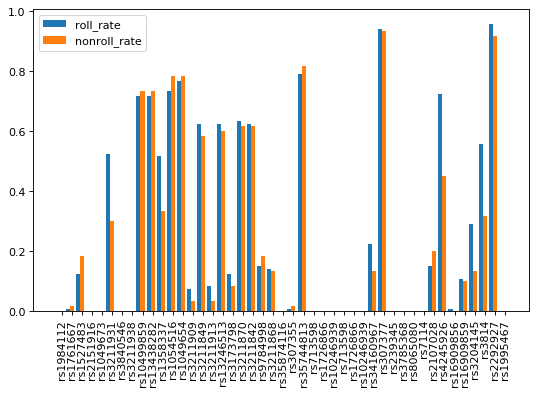

In [342]:
fig,ax = plt.subplots(figsize=(8,5),dpi=80)
width_1 = 0.4

ax.bar(np.arange(len(stat_roll_rate)),stat_roll_rate,width=width_1,tick_label=snp_list,label = "roll_rate")

ax.bar(np.arange(len(stat_nonroll_rate))+width_1,stat_nonroll_rate,width=width_1,tick_label=snp_list,label="nonroll_rate")

plt.xticks(rotation=90)
ax.legend()
plt.savefig("visul.png", bbox_inches = 'tight', dpi = 300)
plt.show()

## Output Table 